In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


#read data
df = pd.read_csv(r'C:\Users\lenovo\Desktop\movies.csv',encoding='cp1252')

In [43]:
# quick get information about data
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [45]:
#see percentage of null data per column
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}".format(col,round(pct_missing)*100))

budget - 0.0
company - 0.0
country - 0.0
director - 0.0
genre - 0.0
gross - 0.0
name - 0.0
rating - 0.0
released - 0.0
runtime - 0.0
score - 0.0
star - 0.0
votes - 0.0
writer - 0.0
year - 0.0


In [47]:
# data types
print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object


In [48]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [51]:
df['budget'] = df['budget'].astype(int)
df['gross']  = df['gross'].astype(int)

In [52]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [56]:
df.sort_values("gross",ascending = False,inplace = False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008
6614,200000000,Lucasfilm,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016
6687,200000000,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016
2870,115000000,Lucasfilm,USA,George Lucas,Action,474544677,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,584809,George Lucas,1999
6398,250000000,Marvel Studios,USA,Joss Whedon,Action,459005868,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015


In [58]:
#lets throw an eye to correlations
df.corr(method = 'pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


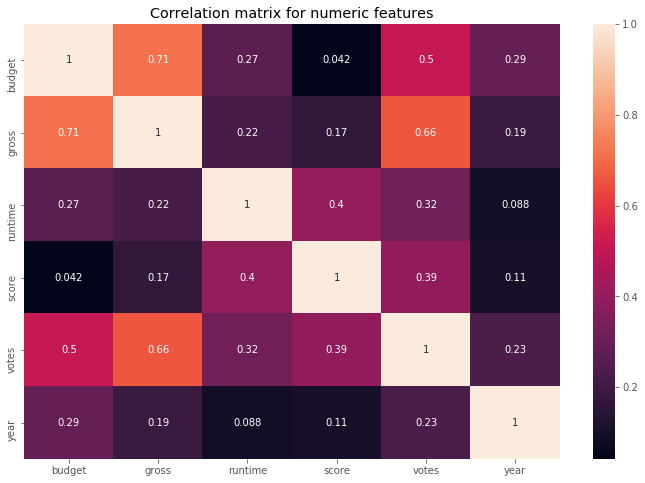

In [60]:
#create an heatmap
corr_map = df.corr()
sns.heatmap(corr_map,annot = True)
plt.title("Correlation matrix for numeric features")
plt.show()

In [61]:
#see correlation for each type of value
df.apply(lambda x: x.factorize()[0]).corr(method = 'pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
budget,1.000000,-0.053390,-0.058972,0.098884,0.009617,0.265780,0.260056,0.033532,0.267866,0.182441,-0.019359,0.082724,0.276622,0.168884,0.274476
company,-0.053390,1.000000,0.207891,0.528937,0.083304,0.595539,0.585783,0.035007,0.590363,-0.017205,-0.028393,0.499675,0.556854,0.525347,0.589459
country,-0.058972,0.207891,1.000000,0.139928,0.026460,0.110702,0.109299,0.170565,0.114623,0.088068,-0.010712,0.153764,0.101652,0.138723,0.107460
director,0.098884,0.528937,0.139928,1.000000,0.050684,0.718102,0.708987,0.059209,0.714279,-0.048564,-0.015889,0.621374,0.692806,0.711480,0.716466
genre,0.009617,0.083304,0.026460,0.050684,1.000000,0.061585,0.064614,0.045332,0.063290,0.068504,-0.044007,0.064794,0.057885,0.054884,0.063244
gross,0.265780,0.595539,0.110702,0.718102,0.061585,1.000000,0.980170,0.015757,0.988701,0.067788,-0.036941,0.696549,0.963910,0.795554,0.997612
name,0.260056,0.585783,0.109299,0.708987,0.064614,0.980170,1.000000,0.016060,0.971935,0.065114,-0.035479,0.686017,0.946291,0.786625,0.980672
rating,0.033532,0.035007,0.170565,0.059209,0.045332,0.015757,0.016060,1.000000,0.018538,0.019492,0.012675,0.083682,0.007277,0.037288,0.012236
released,0.267866,0.590363,0.114623,0.714279,0.063290,0.988701,0.971935,0.018538,1.000000,0.073431,-0.039006,0.692609,0.955360,0.790091,0.989946
runtime,0.182441,-0.017205,0.088068,-0.048564,0.068504,0.067788,0.065114,0.019492,0.073431,1.000000,-0.010943,-0.005030,0.080750,0.016035,0.075231


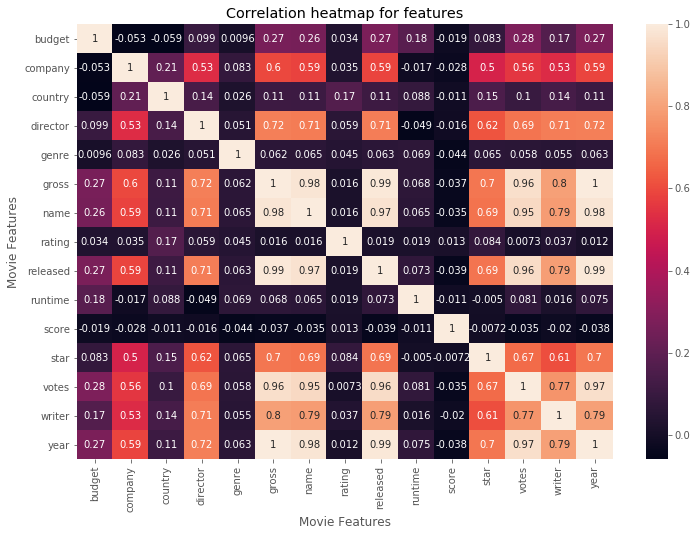

In [64]:
corr_matrix = df.apply(lambda x: x.factorize()[0]).corr(method = 'pearson')
sns.heatmap(data = corr_matrix,annot = True)
plt.title("Correlation heatmap for features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [70]:
#see correlation for each column
corr_pairs = corr_matrix.unstack()
print(corr_pairs)

budget   budget      1.000000
         company    -0.053390
         country    -0.058972
         director    0.098884
         genre       0.009617
         gross       0.265780
         name        0.260056
         rating      0.033532
         released    0.267866
         runtime     0.182441
         score      -0.019359
         star        0.082724
         votes       0.276622
         writer      0.168884
         year        0.274476
company  budget     -0.053390
         company     1.000000
         country     0.207891
         director    0.528937
         genre       0.083304
         gross       0.595539
         name        0.585783
         rating      0.035007
         released    0.590363
         runtime    -0.017205
         score      -0.028393
         star        0.499675
         votes       0.556854
         writer      0.525347
         year        0.589459
                       ...   
writer   budget      0.168884
         company     0.525347
         c

In [72]:
sorted_pairs = corr_pairs.sort_values(kind = "quicksort")
print(sorted_pairs)

budget    country    -0.058972
country   budget     -0.058972
budget    company    -0.053390
company   budget     -0.053390
runtime   director   -0.048564
director  runtime    -0.048564
genre     score      -0.044007
score     genre      -0.044007
released  score      -0.039006
score     released   -0.039006
year      score      -0.038200
score     year       -0.038200
          gross      -0.036941
gross     score      -0.036941
name      score      -0.035479
score     name       -0.035479
          votes      -0.035217
votes     score      -0.035217
company   score      -0.028393
score     company    -0.028393
writer    score      -0.019683
score     writer     -0.019683
          budget     -0.019359
budget    score      -0.019359
company   runtime    -0.017205
runtime   company    -0.017205
director  score      -0.015889
score     director   -0.015889
          runtime    -0.010943
runtime   score      -0.010943
                        ...   
gross     votes       0.963910
votes   

In [74]:
# seems like certain companies works with certain writers.
strong_pairs = sorted_pairs[sorted_pairs > 0.5]
print(strong_pairs)

company   writer      0.525347
writer    company     0.525347
director  company     0.528937
company   director    0.528937
votes     company     0.556854
company   votes       0.556854
          name        0.585783
name      company     0.585783
company   year        0.589459
year      company     0.589459
company   released    0.590363
released  company     0.590363
company   gross       0.595539
gross     company     0.595539
star      writer      0.609884
writer    star        0.609884
director  star        0.621374
star      director    0.621374
votes     star        0.670241
star      votes       0.670241
name      star        0.686017
star      name        0.686017
released  star        0.692609
star      released    0.692609
director  votes       0.692806
votes     director    0.692806
star      year        0.695462
year      star        0.695462
gross     star        0.696549
star      gross       0.696549
                        ...   
gross     votes       0.963910
votes   

In [81]:
#sort companies for total gross
totalgross = df.groupby("company")["gross"].sum().sort_values(ascending = False).astype('int64') 
print(totalgross)

company
Warner Bros.                                           21322318408
Universal Pictures                                     19430051320
Paramount Pictures                                     17115702495
Twentieth Century Fox Film Corporation                 14788570587
Walt Disney Pictures                                   10455507123
Columbia Pictures                                       8824216545
New Line Cinema                                         8540112287
Columbia Pictures Corporation                           7720114061
Touchstone Pictures                                     6688156475
DreamWorks                                              5458121021
DreamWorks Animation                                    4143974397
Metro-Goldwyn-Mayer (MGM)                               3384812932
Pixar Animation Studios                                 3242024778
Fox 2000 Pictures                                       3113861473
TriStar Pictures                                      